### Problem 3

Using Prelim I solution for question 1, I calculated the $\bar{u}$ range with the simulate_lacZ_expression function. This $\bar{u}$ range was then used to calculate $K_X$. Finally, I calculated $p^*$ using the equation derived in part a of this question: $$p^*_i \approx K_{L,i} * K_{X,i} * \bar{u}_i * w_i$$

In [109]:
function simulate_lacZ_expression(GM,W1,W2,Kd,n)

    # initialize -
    lacZ_sim_array = zeros(1000,3)

    # setup inducer range -
    I_range = exp10.(range(-5,0,length=1000))

    # compute -
    for (index,i_val) in enumerate(I_range)
        
        # grab inducer level -
        lacZ_sim_array[index,1] = i_val
        
        # compute u -
        f_val = (i_val^n)/(Kd^n+i_val^2)
        u_value = (W1+W2*f_val)/(1+W1+W2*f_val)

        # compute mRNA 
        lacZ_sim_array[index,2] = GM*u_value

        # grab u -
        lacZ_sim_array[index,3] = u_value
    end

    # return -
    return lacZ_sim_array, I_range
end

simulate_lacZ_expression (generic function with 1 method)

In [119]:
# function compute_gain_function_model(parameter_dictionary::Dict{String,Any})
AV_NUMBER=6.02e23

# the gain is the transcriptional kinetic limit divided by the sink terms (dilution + degradation)

# general stuff -
volume_of_ecoli_cell = 1 # units: mum^3
volume_of_ecoli_cell_L = volume_of_ecoli_cell*((1/1e6)^3)*((100)^3)*(1/1000) # units: L
water_fraction = 0.7 # units: dimensionless
CW = 4.3e-3 # units: g/cell
gDW = (1-water_fraction)*CW # units: gDW/cell
frac_active_RNAP = 0.5 # units: frac active

# ---- denominator - the degradation + dilution terms -------------------------------------------- #
cell_double_time = 40 # units: min
mRNA_half_life = 5 # units: min
specific_growth_rate = (log(2)/cell_double_time)*60.0 # units: hr^-1
mRNA_degradation_rate_constant = -(log(0.5)/(mRNA_half_life))*60.0 # units: hr^-1
denominator = (specific_growth_rate + mRNA_degradation_rate_constant) # units: hr^-1
# ------------------------------------------------------------------------------------------------ #

# ---- numerator - the transcriptional limit ----------------------------------------------------- #
# Kx -
m = 27 # units: muM/s
yi = 400 # units: sec
kI = 1/(yi) # units: sec^-1
KX = m*kI*(volume_of_ecoli_cell_L/gDW)*(1e9/1e6) # units: nmol/gDW       

# RANP concentration -
RNAP_copy_number = 4600 # units: #/cell
RNAP_concentration = (RNAP_copy_number)*(1/AV_NUMBER)*(1/gDW)*1e9 # units: nmol/gDW
RNAP_active = (frac_active_RNAP)*RNAP_concentration

# lacZ gene concentration -
lacZ_copy_number = 1 # units: #/cell
G = (lacZ_copy_number)*(1/AV_NUMBER)*(1/gDW)*1e9 # units: nmol/gDW

# time constant -
RNAP_elongation_rate_ecoli_cell = 62 # units: nt/s
L = 1000 # units: nt
lacZ_L = 333 # units: nt
avg_eln_constant = (RNAP_elongation_rate_ecoli_cell)*(1/L) # units: s^-1
lacZ_eln_constant = avg_eln_constant*(L/lacZ_L) # units: s^-1
tau = (lacZ_eln_constant)/kI # units: dimensionless
numerator = lacZ_eln_constant*(RNAP_active)*(G/(KX*tau+G*(1+tau)))*(3600); # units: nmol/gDW-hr
# ------------------------------------------------------------------------------------------------ #

#     # return -
#     return ((numerator/denominator), KX, tau)
# end

In [122]:

GM = numerator/denominator
W1 = 0.25 # from prelim I solution
W2 = 98.75 # from prelim I solution

# how do we get KD and n?
# we can estimate these by least-squares (correct way), or just fiddle w/them based on estimates -
Kd = 9e-2   # units: mM
n = 1.85    # units: dimensionless
sim_array_lacZ, I_range = simulate_lacZ_expression(GM,W1,W2,Kd,n);
u = sim_array_lacZ[:,3];

In [123]:
Kl = 200 # muM
Kp = 1
wi = 1

pstar = GM*Kl*wi*u;

In [124]:
using Plots

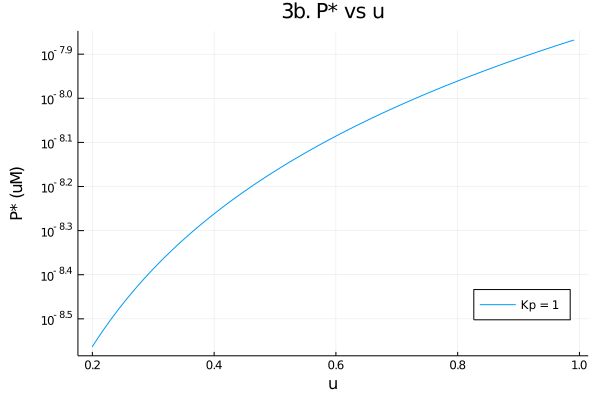

In [125]:
# 3b
# Kp = 1

plot(u, pstar, yaxis=("P* (uM)", :log), xaxis="u", labels="Kp = 1", title="3b. P* vs u", legend=:bottomright)

In [126]:
# 3c 
# Kp > 1

Kp = 10
Kl_c = Kl*Kp

pstar_c = GM*Kl_c*wi*u;

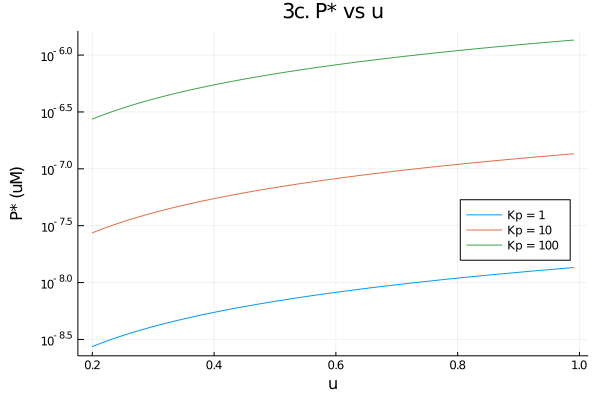

In [130]:
plot(u, pstar, labels="Kp = 1")
plot!(u, pstar_c, labels="Kp = 10", title="3c. P* vs u", yaxis=("P* (uM)",:log), 
    xaxis="u", legend=:right)
plot!(u, pstar_c*10, labels="Kp = 100")
